In [46]:
# Sources: 
# https://medium.com/mlearning-ai/basic-exploratory-data-analysis-template-for-regression-problems-20ca00c58f7d
# https://machine-learning-with-python.readthedocs.io/en/latest/

from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# LOADING DIABETES DATA (INPUT FEATURES) AND STORING IT IN A DATA FRAME
data = pd.DataFrame(load_diabetes()["data"],columns=load_diabetes()["feature_names"])
#ADDING TARGET VARIABLE TO THE DATA FRAME
data["target"] = load_diabetes()["target"]

data.loc[data["sex"]>0,"sex"] = 1
data.loc[data["sex"]<0,"sex"] = 0
data["sex"] = data["sex"].astype(np.int8)

Overview

In [30]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [31]:
data.shape

(442, 11)

In [32]:
data.dtypes

age       float64
sex          int8
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Basic Statistics

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-1.444295e-18,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,4.683258e-01,0.499561,0.000000,0.000000,0.000000,1.000000,1.000000
bmi,442.0,-2.255925e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.854086e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.428596e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.898811e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-6.028360e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-1.788100e-17,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.243486e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.351770e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


Split categorical and numeric features

In [34]:
numeric_features = list(data.select_dtypes("float64").columns)
numeric_features.remove('target')
categorical_features = list(data.select_dtypes("int8").columns)
target = "target"
print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')

numeric_features:
['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

categorical_features:
['sex']

target:
target


Missing values: Percentages

In [35]:
np.round(data.isnull().mean() * 100,1)

age       0.0
sex       0.0
bmi       0.0
bp        0.0
s1        0.0
s2        0.0
s3        0.0
s4        0.0
s5        0.0
s6        0.0
target    0.0
dtype: float64

## Univariate Analysis

Distribution of categorical features

In [36]:
for i in categorical_features:
    print(f'{i}\n{np.round((data[i].value_counts() / data[i].value_counts().sum()) * 100,2)}')

sex
0    53.17
1    46.83
Name: sex, dtype: float64


Distribution of numerical features (density function)

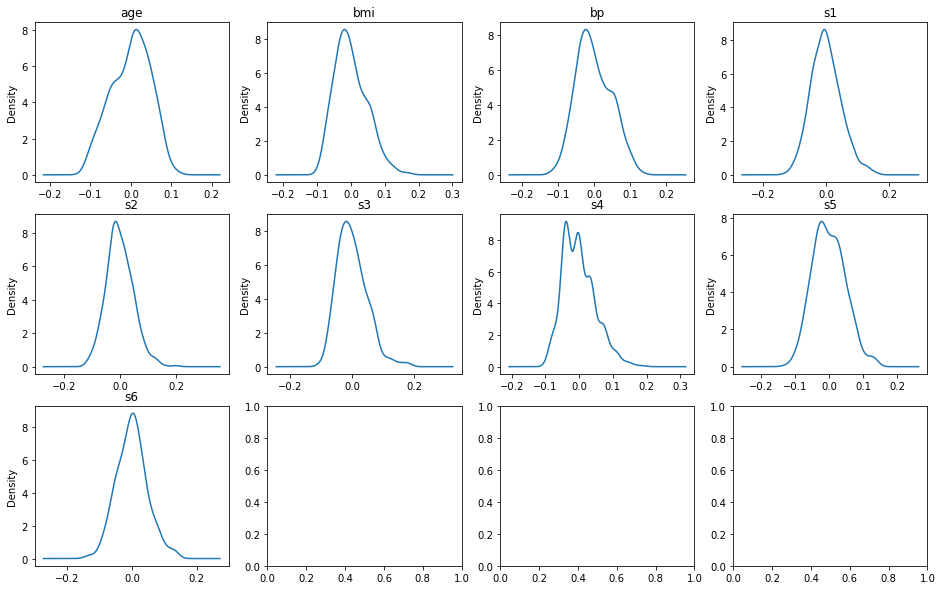

In [37]:

fig,ax = plt.subplots(3,4,figsize=(16,10)) # rows, columns 
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%4 == 0) & (n > 0):
        row += 1
        col = 0
    data[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

Target attribute

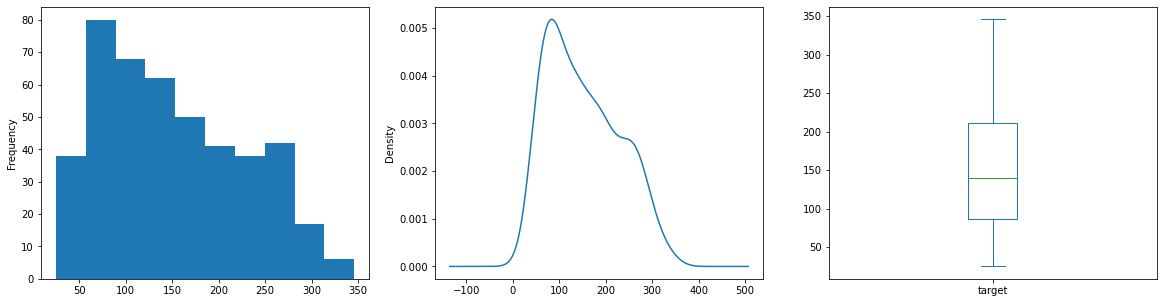

target: Not Gaussian  NormaltestResult(statistic=64.15092254678288, pvalue=1.1743678801847827e-14)


In [45]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
data[target].plot(kind="hist",ax=ax[0])
data[target].plot(kind="kde",ax=ax[1])
data[target].plot(kind="box",ax=ax[2])
plt.show()
print(f'{target}: {"Not Gaussian" if normaltest(data[target].values,)[1]<0.05 else "Gaussian"}  {normaltest(data[target].values)}')

## Multivariate Analysis

Distribution of categorical features for target levels

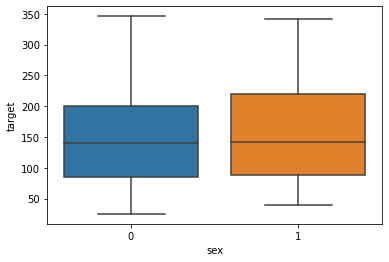

In [49]:
sns.boxplot(x=data[categorical_features[0]],y=data[target])

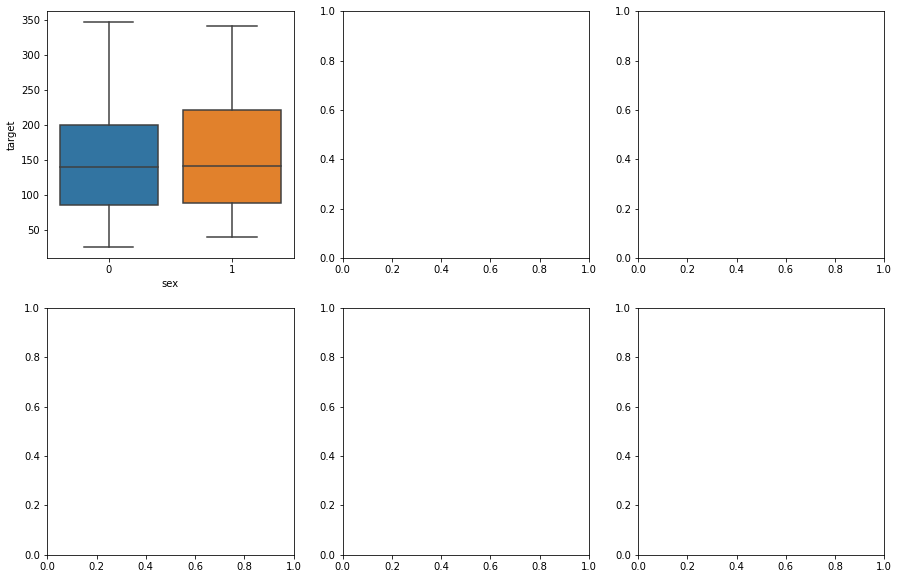

In [56]:
fig,ax = plt.subplots(2,3,figsize=(15,10)) # rows, columns
row = col = 0
for n,i in enumerate(categorical_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.boxplot(x=i,y="target",data=data,ax=ax[row,col])
    #sns.boxplot(x=data[categorical_features[0]],y=data[target])
    col += 1

Covariation of numerical features with target 

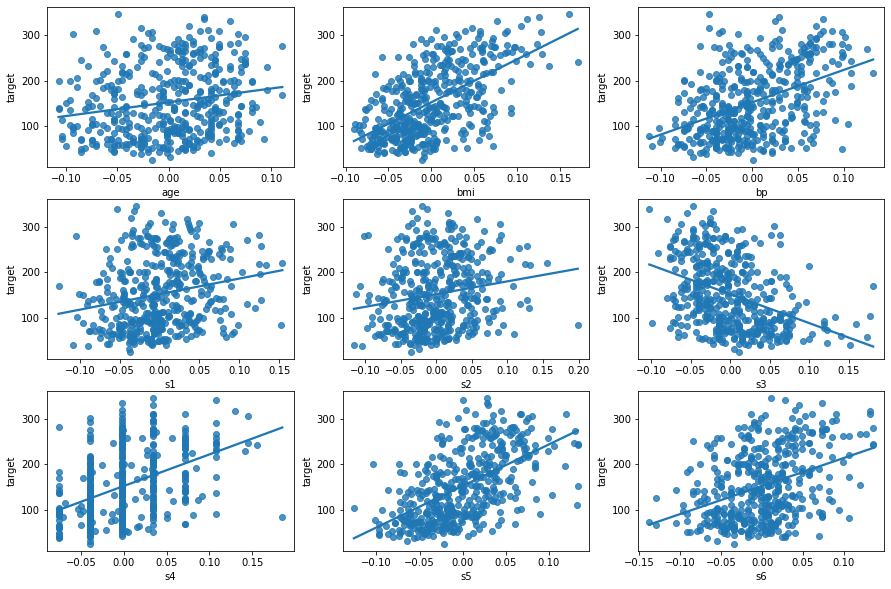

In [42]:
fig,ax = plt.subplots(3,3,figsize=(15,10)) # rows, columns
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.regplot(x=i,y="target",data=data,ax=ax[row,col],ci=False)
    col += 1

Correlation heatmap

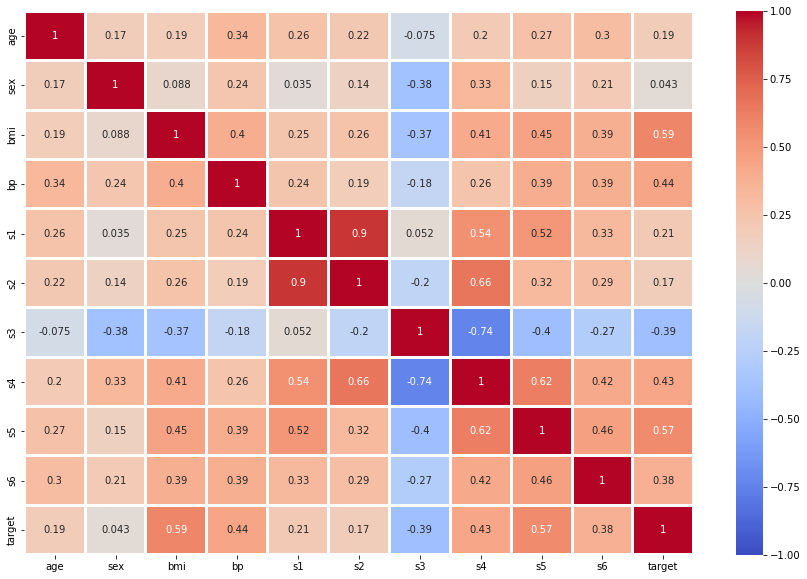

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linewidths=2, cmap='coolwarm',vmin=-1, vmax=1, center=0)

Full pairplot

In [67]:
# sns.pairplot(data)